### Milestone 5: Final code, final documentation, final thoughts

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

#### Step 1: Data Preparation

The dataset NYC_Weather_2022-2024, obtained from NOAA, provides daily weather summaries for the period between December 1, 2022, and December 1, 2024. It includes variables such as precipitation, snowfall, snow depth, maximum temperature, minimum temperature, average daily wind speed, water equivalent of snowfall, and water equivalent of snow on the ground. Unfortunately, humidity data is not available from NOAA.

In [2]:
# Load data
file_path = '../data/NYC_Weather_2022-2024.csv'
nyc_weather_data = pd.read_csv(file_path)

nyc_weather_data.head()

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT11
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,NaN,NaN,NaN,NaN,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,NaN,NaN,NaN,NaN,0.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,NaN,NaN,NaN,NaN,0.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,NaN,NaN,NaN,NaN,1.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Select relevant features
relevant_columns = ['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD']
weather_subset = nyc_weather_data[relevant_columns].copy()

weather_subset.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert 'DATE' to datetime format
weather_subset['DATE'] = pd.to_datetime(weather_subset['DATE'])

# Fill missing values with the median
weather_subset.fillna(weather_subset.median(numeric_only=True), inplace=True)

weather_subset.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,1.05,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,0.00,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,0.09,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,0.50,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,1.38,0.0,0.0,65.0,47.0,7.16,220.0,0.0,0.0


In [5]:
# Separate the non-numeric columns
date_column = weather_subset['DATE']
station_column = weather_subset['STATION']
name_column = weather_subset['NAME']
weather_numeric = weather_subset.drop(columns=['DATE', 'STATION', 'NAME'])

# Normalize numerical features
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_numeric)

# Recombine 'DATE' with the scaled data
weather_scaled_df = pd.DataFrame(weather_scaled, columns=weather_numeric.columns)
weather_scaled_df.insert(0, 'STATION', station_column.reset_index(drop=True))
weather_scaled_df.insert(1, 'NAME', name_column.reset_index(drop=True))
weather_scaled_df.insert(2, 'DATE', date_column.reset_index(drop=True))


# Verify the scaled data
weather_scaled_df.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,WDF2,WESF,WESD
0,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-01,2.133103,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
1,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-02,-0.370117,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
2,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-03,-0.155555,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
3,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-04,0.821893,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374
4,US1NJUN0028,"SPRINGFIELD TWP 0.7 NNE, NJ US",2022-12-07,2.919830,-0.06785,-0.07761,0.01009,-0.026203,-0.037266,0.02627,-0.044179,-0.037374


In [6]:
# Group data by 'STATION' and save each group to a separate file
stations = weather_scaled_df['STATION'].unique()

num_stations = len(stations)

# Directory to save split files
output_dir = '../data/split_stations/'

# Create directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Save each station's data to a separate CSV file
file_paths = []
for station in stations:
    station_data = weather_scaled_df[weather_scaled_df['STATION'] == station]
    file_name = f"{station.replace('/', '_')}.csv"
    file_path = os.path.join(output_dir, file_name)
    station_data.to_csv(file_path, index=False)
    file_paths.append(file_path)

print(f"Data saved for {num_stations} stations.")

Data saved for 127 stations.


In [7]:
# Check completeness of data for each station
completeness_report = {}

for station in stations:
    station_data = weather_scaled_df[weather_scaled_df['STATION'] == station]
    
    # Define relevant columns for completeness check
    relevant_columns = ['TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD', 'PRCP']
    
    # Extract the station name (index 1 in weather_scaled_df)
    station_name = station_data.iloc[0, 1]  # Assuming the name is at index 1

    # Count non-NaN rows
    valid_rows = station_data[relevant_columns].dropna().shape[0]
    total_rows = station_data.shape[0]
    
    # Store completeness info along with station name
    completeness_report[station] = {
        'Name': station_name,
        'Valid Rows': valid_rows,
        'Total Rows': total_rows,
        'Completeness %': (valid_rows / total_rows) * 100
    }

# Convert report to DataFrame for sorting
completeness_df = pd.DataFrame.from_dict(completeness_report, orient='index')
completeness_df = completeness_df.sort_values(by='Valid Rows', ascending=False)

# Display the station with the most complete data
most_complete_station = completeness_df.index[0]
most_complete_station_name = completeness_df.loc[most_complete_station, 'Name']

print(f"The station with the most complete data is: {most_complete_station} ({most_complete_station_name})")
completeness_df.head()

The station with the most complete data is: USW00014734 (NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US)


,Name,Valid Rows,Total Rows,Completeness %
USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",732,732,100.0
US1NJBG0064,"WOOD RIDGE 0.2 N, NJ US",732,732,100.0
USW00014732,"LAGUARDIA AIRPORT, NY US",732,732,100.0
USC00301309,"CENTERPORT, NY US",732,732,100.0
USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",732,732,100.0


In [8]:
# Split data into train and test sets (time-based split)
train_data = weather_scaled_df[weather_scaled_df['DATE'] < '2024-01-01']
test_data = weather_scaled_df[weather_scaled_df['DATE'] >= '2024-01-01']

#### Step 2: Modeling

Random Forest is an ensemble method that combines multiple decision trees to capture non-linear relationships, making it ideal for complex weather data. By averaging predictions, it reduces overfitting and provides robust results. Its built-in feature importance scores help identify the variables most predictive of precipitation.

In [9]:
# Define features and target
features = ['TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD']
target = 'PRCP'  # Predicting precipitation

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

In [10]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.9547641706151554
R²: -0.030006047072435038


This indicates that the model is barely better than predicting the mean for PRCP.

In [11]:
# Feature importance analysis
importances = regressor.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

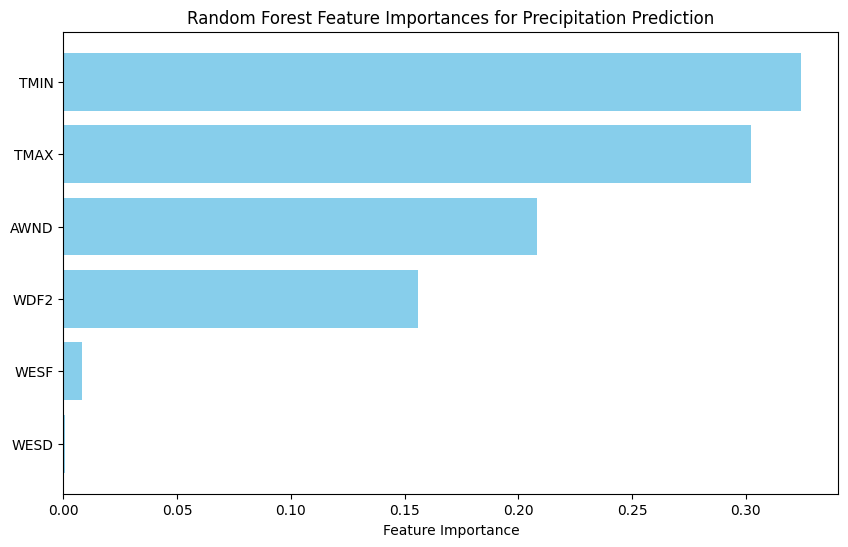

In [12]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances for Precipitation Prediction")
plt.gca().invert_yaxis()
plt.show()

**Potential Reasons**
-   Without key features like humidity or weather patterns, the model lacks sufficient information to make good predictions.
-   Precipitation often has many zeros (dry days), which makes modeling challenging.

**Potential Solutions**
-   Adding derived features
-   Treating PRCP as a classification + regression problem
-   Applying PCA to reduce noise

#### Step 3: Refining the Model

In [13]:
train_data = train_data.copy()
test_data = test_data.copy()

# Add derived features
train_data['TEMP_RANGE'] = train_data['TMAX'] - train_data['TMIN']
test_data['TEMP_RANGE'] = test_data['TMAX'] - test_data['TMIN']

train_data['DAY_OF_YEAR'] = train_data['DATE'].dt.dayofyear
test_data['DAY_OF_YEAR'] = test_data['DATE'].dt.dayofyear

train_data['WIND_EFFECT'] = train_data['AWND'] * train_data['WDF2']
test_data['WIND_EFFECT'] = test_data['AWND'] * test_data['WDF2']


In [14]:
# Update feature list
features = ['TMAX', 'TMIN', 'AWND', 'WDF2', 'WESF', 'WESD', 'TEMP_RANGE', 'DAY_OF_YEAR', 'WIND_EFFECT']
target = 'PRCP'

# Redefine X_train and X_test
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [15]:
# Add binary RAINY column
train_data['RAINY'] = (train_data['PRCP'] > 0).astype(int)
test_data['RAINY'] = (test_data['PRCP'] > 0).astype(int)

# Classification Features and Target
X_train_clf = X_train.copy()
X_test_clf = X_test.copy()
y_train_clf = train_data['RAINY']
y_test_clf = test_data['RAINY']

In [16]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict RAINY
y_pred_clf = clf.predict(X_test_clf)

# Evaluate Classification
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf))

Classification Accuracy: 0.723404255319149
Confusion Matrix:
[[20481  4095]
 [ 4290  1449]]


The model predicts “rainy days” vs. “non-rainy days” correctly ~72% of the time. According to the confusion matrix, the model still struggles with precision for rainy days, likely because rainy days are less frequent in the dataset.

In [17]:
# Filter for rainy days (RAINY = 1)
rainy_train = train_data[train_data['RAINY'] == 1]
rainy_test = test_data[test_data['RAINY'] == 1]

X_train_reg = rainy_train[features]
y_train_reg = rainy_train['PRCP']
X_test_reg = rainy_test[features]
y_test_reg = rainy_test['PRCP']

# Train Regression Model
regressor_rainy = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rainy.fit(X_train_reg, y_train_reg)

# Predict Precipitation for Rainy Days
y_pred_reg = regressor_rainy.predict(X_test_reg)

# Evaluate Regression for Rainy Days
rmse_rainy = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"RMSE for Rainy Days: {rmse_rainy}")

RMSE for Rainy Days: 1.981079877602387


When predicting precipitation amounts only on rainy days, the RMSE is reasonably low.

RMSE after PCA: 1.172844059766544


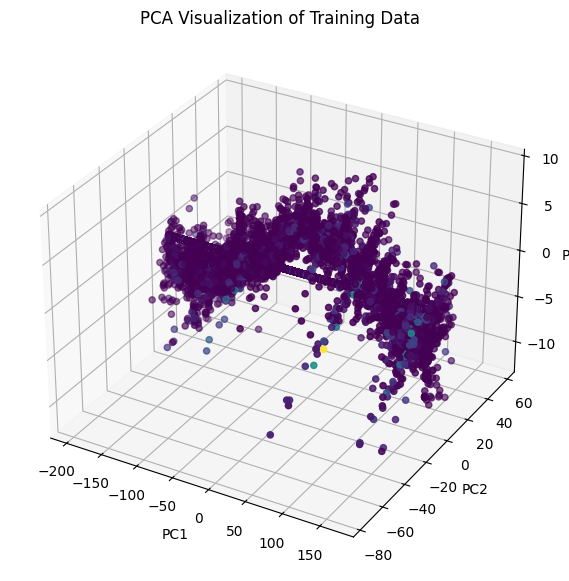

In [18]:
# Apply PCA to training and testing data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Regression Model on PCA Components
regressor_pca = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_pca.fit(X_train_pca, y_train)

# Predict
y_pred_pca = regressor_pca.predict(X_test_pca)

# Evaluate PCA Model
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print(f"RMSE after PCA: {rmse_pca}")

# Visualize PCA Components
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')
ax.set_title("PCA Visualization of Training Data")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

PCA helps reduce noise and dimensionality, leading to an RMSE close to the full-featured model but with fewer components.

In [19]:
# Final Predictions: Combine Classification and Regression
y_final_pred = np.zeros(len(y_test))
rainy_indices = np.where(y_pred_clf == 1)[0]

# Fill precipitation values for predicted rainy days
y_final_pred[rainy_indices] = regressor_rainy.predict(X_test.iloc[rainy_indices])

# Evaluate Final Combined Model
rmse_final = np.sqrt(mean_squared_error(y_test, y_final_pred))
print(f"Final Combined RMSE: {rmse_final}")

Final Combined RMSE: 1.1686438157444534


The combined classification + regression approach achieves the best RMSE, improving significantly over earlier results.

**Conclusions**

Predicting whether it rains (binary classification) improved the overall model pipeline. Once rainy days are identified, the regression model predicts precipitation with RMSE ~1.98. This means the model can approximate precipitation amounts with reasonable accuracy. PCA proves effective in reducing redundancy in features without much performance loss. The final combined RMSE of 1.16 and classification accuracy of 72.3% are strong outcomes given the dataset’s limitations.

#### Step 4: Interface

In [21]:
import joblib

# Create the 'models' directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Save the trained model and scalers
joblib.dump(regressor, './models/weather_regressor.pkl')
joblib.dump(scaler, './models/weather_scaler.pkl')

['./models/weather_scaler.pkl']